# Time Series Data Exercies

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20

import warnings
warnings.filterwarnings('ignore')

## sf_temps

In [2]:
from vega_datasets import data
data.sf_temps()


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [5]:
try:
    pd.to_datetime(df.date)
except ValueError as e:
    print('ValueError', e)

In [6]:
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


Resample by the day and take the average temperature. Visualize the average temperature over time.

In [7]:
daily_avg = df.resample('D').mean()
daily_avg.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

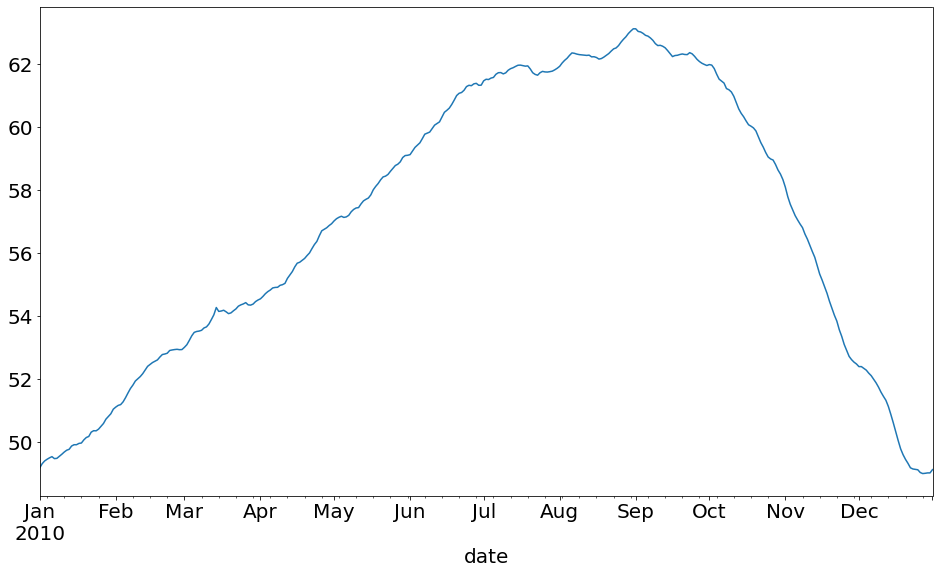

In [8]:
daily_avg.temp.plot()

Write the code necessary to visualize the minimum temperature over time

In [9]:
daily_min = df.resample('D').min()
daily_min

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


<AxesSubplot:xlabel='date'>

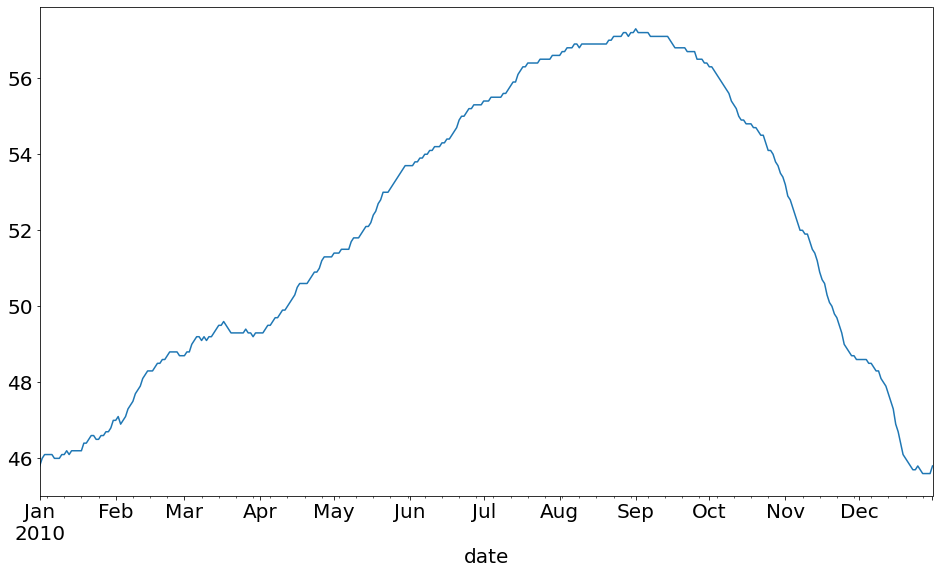

In [10]:
daily_min.temp.plot()

Write the code necessary to visualize the maximum temperature over time.

In [11]:
daily_max = df.resample('D').max()
daily_max

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8
...,...
2010-12-27,53.2
2010-12-28,53.2
2010-12-29,53.2


<AxesSubplot:xlabel='date'>

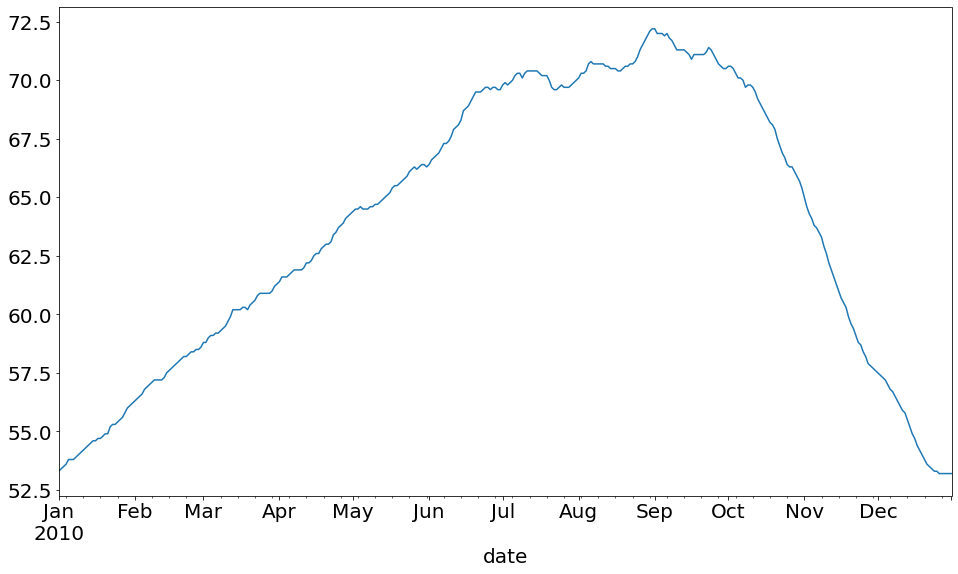

In [12]:
daily_max.temp.plot()

Which month is the coldest, on average?

In [13]:
df.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='date', length=8759)

In [14]:
df['month_name'] = df.index.month_name()
df

,temp,month_name
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January
...,...,...
2010-12-31 19:00:00,50.4,December
2010-12-31 20:00:00,49.9,December
2010-12-31 21:00:00,49.4,December


In [15]:
monthly_avg= df.groupby('month_name').mean()
monthly_avg

,temp
month_name,
April,55.633056
August,62.405376
December,50.498253
February,52.243899
January,49.984140
July,61.765457
June,60.444722
March,53.956528
May,57.970968


In [16]:
monthly_avg.sort_values(by=['temp'], inplace=True)
monthly_avg

,temp
month_name,
January,49.984140
December,50.498253
February,52.243899
March,53.956528
November,55.185139
April,55.633056
May,57.970968
October,60.253091
June,60.444722


January had the coldest month on average

Which month has the highest average temperature?

In [17]:
monthly_avg.sort_values(by=['temp'], inplace=True, ascending=False)
monthly_avg

,temp
month_name,
September,62.487083
August,62.405376
July,61.765457
June,60.444722
October,60.253091
May,57.970968
April,55.633056
November,55.185139
March,53.956528


September had the highest average temperature.

Resample by the day and calculate the min and max temp for the day 

(Hint: .agg(['min', 'max'])).

 Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [18]:
daily_min_max = df.resample('D').df.temp.agg()
daily_min_max

,temp,month_name
date,,
2010-01-01,45.8,January
2010-01-02,46.0,January
2010-01-03,46.1,January
2010-01-04,46.1,January
2010-01-05,46.1,January
...,...,...
2010-12-27,45.6,December
2010-12-28,45.6,December
2010-12-29,45.6,December


## seattle_weather

In [19]:
from vega_datasets import data
data.seattle_weather()

seattle = data.seattle_weather()

In [20]:
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [21]:
seattle.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [22]:
try:
    pd.to_datetime(seattle.date)
except ValueError as e:
    print('ValueError', e)

In [23]:
seattle = seattle.set_index('date').sort_index()
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog
